# Aula 7: Overfitting

Nessa aula vamos aprender a ajustar modelos e verificar quando ocorre overfitting. Vamos fazer o ajuste de um conjunto de pontos a partir de um polinômio, usando um método de regressão linear.

Vamos gerar os dados a partir uma função definida:

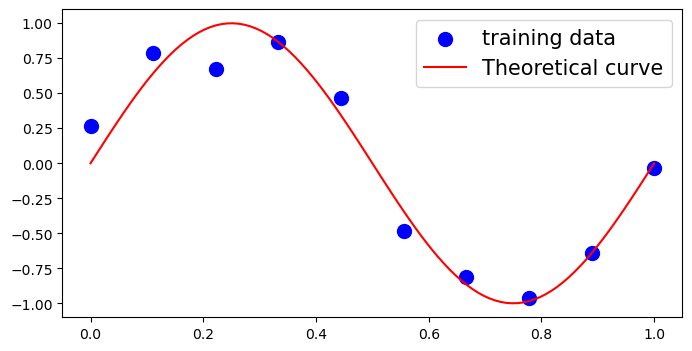

In [1]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(10)

#função para gerar os dados
def function(x):
    y = np.sin(2 * np.pi * x)
    #y = np.cos(2 * np.pi * x)
    #y = x**4 + x**9
    return y

# training set
N_train = 10
sigma = 0.2
x_train= np.linspace(0, 1,N_train)
y_train = function(x_train) + np.random.normal(0,sigma, N_train)
x_train = x_train.reshape(len(x_train), 1)

fig = plt.figure(figsize=(8, 4))
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", 
            s=100, label="training data")

# test set
N_test = 20
x_test=np.linspace(0, 1,N_test)
y_test = function(x_test) +  np.random.normal(0,sigma, N_test)
x_test = x_test.reshape(len(x_test), 1)

# Curva teorica
xt = np.linspace(0,1,100)
yt = function(xt)
plt.plot(xt,yt, '-r',  label="Theoretical curve")
plt.legend(fontsize=15)
plt.show(True)

Os dados que temos acesso são os pontos em azul. A curva em vermelho é desconhecida, representando o modelo gerador dos dados.

Vamos fazer o ajuste usando um polinômio de grau $M$.

$ f(x,\theta) = \theta_0 + \theta_1 x + \theta_2 x^{2} + ... + \theta_M x^{M}$

Inicialmente, vamos considerar $M=1$, ou seja, um ajuste linear.

$f(x,\theta) = \theta_0 + \theta_1 x$



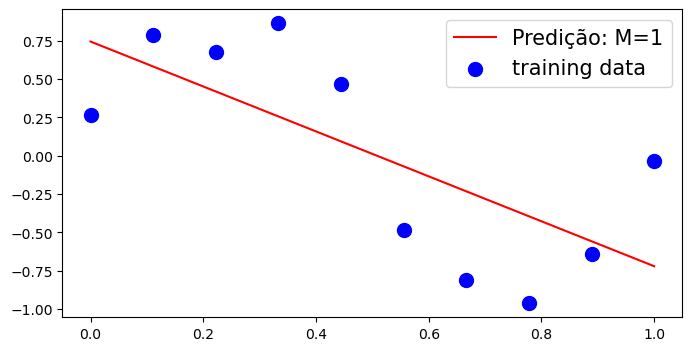

In [2]:
from sklearn import linear_model

# usa regressão linear para ajustar o modelo
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

# preve os valores de y a partir de x
xplot=np.linspace(0,1,200)
xplot=xplot.reshape(len(xplot), 1)
Y_pred = model.predict(xplot)

# mostra os resultados
fig = plt.figure(figsize=(8, 4))
plt.plot(xplot, Y_pred, label='Predição: M=1', color = 'red')
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, 
            label="training data")
plt.legend(fontsize=15)
plt.show(True)


Notamos que, nesse caso, o ajuste é muito ruim, pois os dados foram gerados a partir de uma função não-linear. Esse fenômeno é chamado underfitting e ocorre quando o viíes (bias) é grande.

Vamos fazer o ajuste usando um polinômio de grau $M=3$

$f(x, \theta) = \theta_0 + \theta_1 x + \theta_2 x^{2} + \theta_3 x^{3}$


In [3]:
from sklearn.preprocessing import PolynomialFeatures
# Define a matriz de atributos
poly3 = PolynomialFeatures(degree=3)
X = poly3.fit_transform(x_train) 
print('X^0             X^1          Xˆ2         Xˆ3')
print(X)
model = linear_model.LinearRegression()
model.fit(X,y_train)
# graficamos a curva obtida a partir da predição
Xplot=poly3.fit_transform(xplot)

X^0             X^1          Xˆ2         Xˆ3
[[1.         0.         0.         0.        ]
 [1.         0.11111111 0.01234568 0.00137174]
 [1.         0.22222222 0.04938272 0.01097394]
 [1.         0.33333333 0.11111111 0.03703704]
 [1.         0.44444444 0.19753086 0.0877915 ]
 [1.         0.55555556 0.30864198 0.17146776]
 [1.         0.66666667 0.44444444 0.2962963 ]
 [1.         0.77777778 0.60493827 0.47050754]
 [1.         0.88888889 0.79012346 0.70233196]
 [1.         1.         1.         1.        ]]


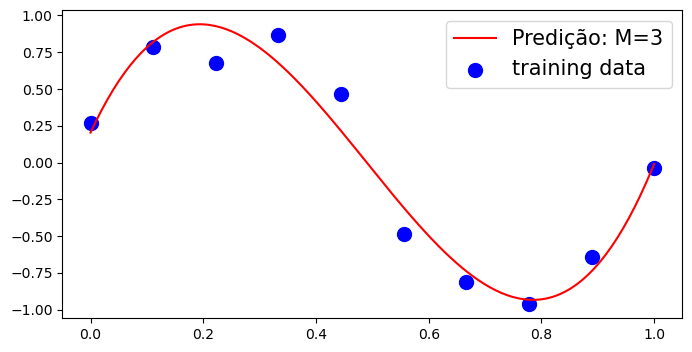

In [4]:
Y_pred = model.predict(Xplot)
fig = plt.figure(figsize=(8, 4))
plt.plot(xplot, Y_pred, label='Predição: M=3', color = 'red')
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, 
            label="training data")
plt.legend(fontsize=15)
plt.show(True)

Nesse caso, o ajuste reproduz melhor a tendência observada nos dados.

Vamos verificar para um polinômio de grau $M=9$

$f(x,\theta) = \theta_0 + \theta_1 x + ... + \theta_9 x^{9}$

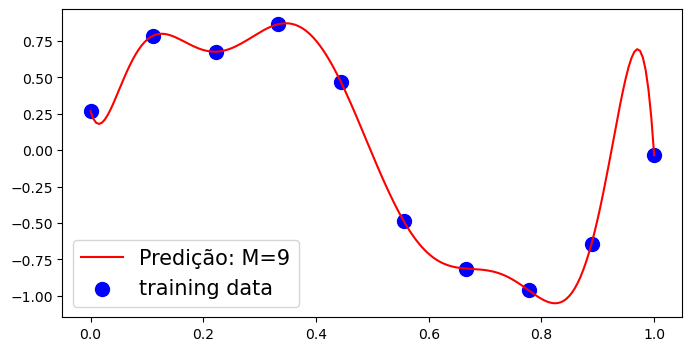

In [5]:
poly9 = PolynomialFeatures(degree=9)
X = poly9.fit_transform(x_train)
model = linear_model.LinearRegression()
model.fit(X,y_train)

Xplot=poly9.fit_transform(xplot)
Y_pred = model.predict(Xplot)
fig = plt.figure(figsize=(8, 4))
plt.plot(xplot, Y_pred, label='Predição: M=9', color = 'red')
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, 
            label="training data")
plt.legend(fontsize=15)
plt.show(True)

Para um polinômio de grau $M=9$, a curva se ajusta a todos os pontos. Em princícipio, esse parece ser o melhor ajuste. No entanto, essa é uma indicação que o modelo está sobre-ajustado, de modo que consegue predizer o conjunto de treinamento perfeitamente. Ou seja, o modelo está memorizando os dados. Esse é um caso típico de $\textbf{overfitting}$.

Notem ainda que os valores dos coeficientes do modelo são bastante altos, sendo uma outra indicação de overfitting. Esses coeficientes podem ser diminuidos com o uso de regularização, que veremos a seguir.

In [6]:
print("Coeficientes do modelo ajustado:", model.coef_)

Coeficientes do modelo ajustado: [ 0.00000000e+00 -1.28898114e+01  5.66730669e+02 -6.64239852e+03
  3.71710955e+04 -1.14791788e+05  2.05738781e+05 -2.13107899e+05
  1.18357094e+05 -2.72790272e+04]


O ajuste foi feito no conjunto de treinamento. Precisamos agora analisar a capacidade de generalização do modelo. Para isso, vamos fazer a previsão em novos dados, ou seja, no conjunto de teste.

Vamos analisar o erro na predição em função do grau do polinômio. O erro é calculando quando consideramos o conjunto de treinamento e teste, onde obtemos duas curvas distintas.

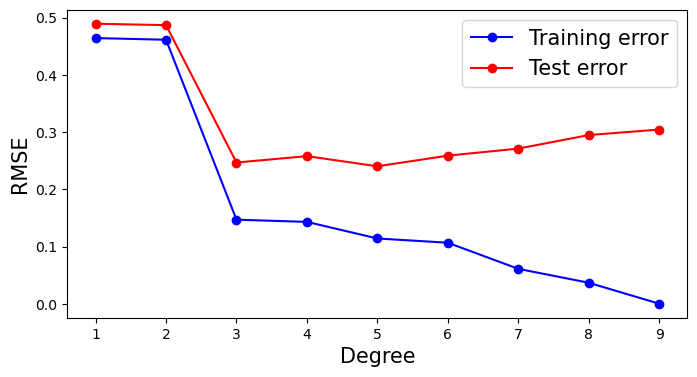

In [7]:
#Funcao para calcular o erro quadrático médio
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

# lista que armazena os erros de acordo com o grau do polinomio
training_errors = []
test_errors = []
degree = [] # armazena os graus do polinomio
for M in np.arange(1,10):   
    # modelo a ser usado: regressão linear
    model = linear_model.LinearRegression()
    # transforma os dados para obter a matriz onde cada coluna i armazena x**i
    poly = PolynomialFeatures(degree=M) 
    X_train = poly.fit_transform(x_train)
    # realiza a regressão linear no conjunto de treinamento
    model.fit(X_train,y_train)
    Y_pred = model.predict(X_train)
    error_train = rmse(Y_pred,y_train)
    training_errors.append(error_train)

    # realiza a regressão linear no conjunto de teste
    X_test=poly.fit_transform(x_test)
    Y_pred2 = model.predict(X_test)
    error_test = rmse(Y_pred2, y_test)
    test_errors.append(error_test)
    degree.append(M)
fig = plt.figure(figsize=(8, 4))
plt.plot(degree, training_errors, 'b-o', label = 'Training error')
plt.plot(degree, test_errors, 'r-o', label= 'Test error')
plt.xlabel("Degree", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
plt.legend(fontsize = 15)
plt.show(True)

Notem que o erro na predição, quando usamos o conjunto de teste, tende a aumentar quando aumentamos o grau do polinômio, ou seja, quando aumentamos a complexidade do modelo. Essa é uma indicação de overfitting. Overfitting ocorre quando há um aumento no erro calculado no conjunto de teste, mas há uma alta taxa de acerto no conjunto de treinamento. Notem que o erro no conjunto de treinamento vai a zero quando aumentamos o grau do polinômio. Nesse caso, a curva se ajusta a todos os pontos, como vimos anteriormente para $M=9$. Em resumo, dizemos que quando ocorre overfitting, o modelo está "memorizando" os dados e não "aprendendo", conforme o esperado.

Se aumentarmos o número de elementos no conjunto de treinamento, reduzimos o overfitting. Ou seja, precisamos balancear a complexidade do modelo de acordo com o volume de dados disponíveis. Vamos gerar os dados como anteriormente, mas com mais pontos

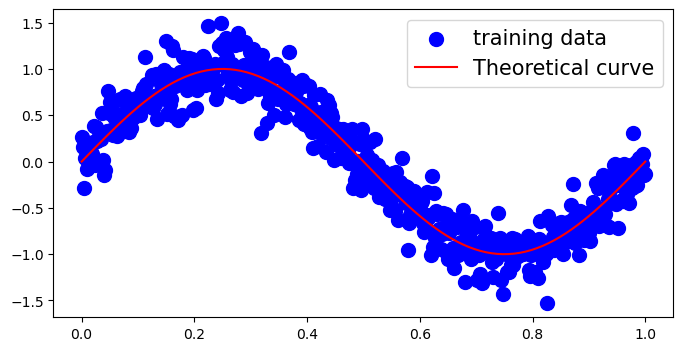

In [8]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(10)

# training set
N_train = 500
sigma = 0.2
x_train= np.linspace(0, 1,N_train)
y_train = function(x_train) + np.random.normal(0,sigma, N_train)
x_train = x_train.reshape(len(x_train), 1)

fig = plt.figure(figsize=(8, 4))
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", 
            s=100, label="training data")

# test set
N_test = 100
x_test=np.linspace(0, 1,N_test)
y_test = function(x_test) +  np.random.normal(0,sigma, N_test)
x_test = x_test.reshape(len(x_test), 1)


# Theoretical curves
xt = np.linspace(0,1,100)
yt = function(xt)
plt.plot(xt,yt, '-r',  label="Theoretical curve")
plt.legend(fontsize=15)
plt.show(True)

Para um polinômio de grau $M=9$, vemos que com mais pontos, overfitting deixa de ocorrer.

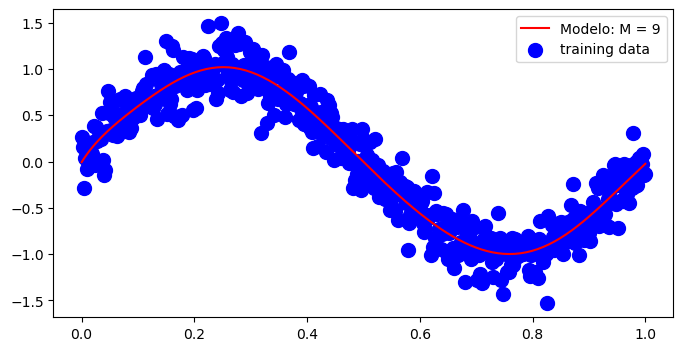

In [9]:
fig = plt.figure(figsize=(8, 4))

poly9 = PolynomialFeatures(degree=9)
X = poly9.fit_transform(x_train)
clf9 = linear_model.LinearRegression()
clf9.fit(X,y_train)

Xplot=poly9.fit_transform(xplot)
Y_pred = clf9.predict(Xplot)
plt.plot(xplot, Y_pred, '-r',  label='Modelo: M = 9')
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", 
            s=100, label="training data")
plt.legend()
plt.show(True)

Além disso, podemos até usar polinômios de grau maior. Analisando o erro em função do grau do polinômio, vemos que ocorre overfitting apenas para polinômios de grau muito alto.

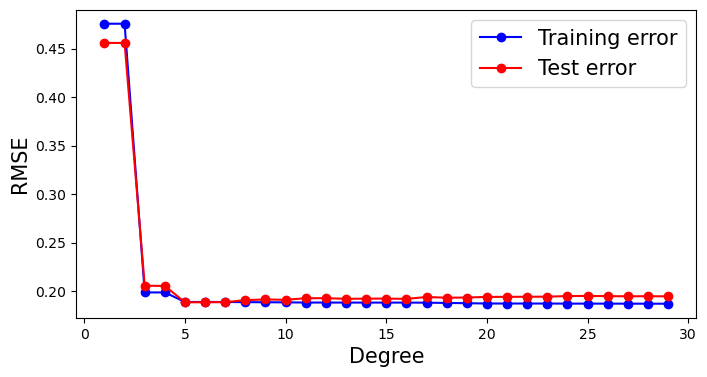

In [10]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []
degree = []
for M in np.arange(1,30):    
    poly = PolynomialFeatures(degree=M)
    X_train = poly.fit_transform(x_train)
    clf = linear_model.LinearRegression()
    clf.fit(X_train,y_train)
    Y_pred = clf.predict(X_train)
    error_train = rmse(Y_pred,y_train)
    training_errors.append(error_train)
    
    X_test=poly.fit_transform(x_test)
    Y_pred2 = clf.predict(X_test)
    error_test = rmse(Y_pred2, y_test)
    test_errors.append(error_test)
    degree.append(M)
fig = plt.figure(figsize=(8, 4))
plt.plot(degree, training_errors, 'b-o', label = 'Training error')
plt.plot(degree, test_errors, 'r-o', label= 'Test error')
plt.xlabel("Degree", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
plt.legend(fontsize = 15)
plt.show(True)

Ou seja, quanto mais dados estiverem disponíveis, maior pode ser a complexidade do modelo. Temos que ter uma balanço entre complexidade do modelo e dados disponíveis. Esse balanço deve ser levado em conta quando modelos um conjunto de dados.

# Regularização
Vamos gerar os dados novamente.

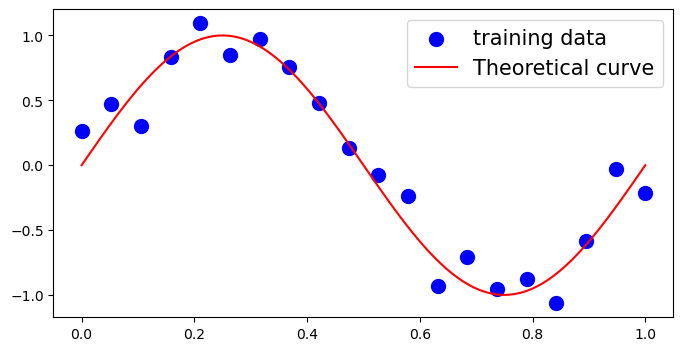

In [11]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(10)

#função para gerar os dados
def function(x):
    y = np.sin(2 * np.pi * x)
    #y = np.cos(2 * np.pi * x)
    #y = x**4 + x**9
    return y

# training set
N_train = 20
sigma = 0.2
x_train= np.linspace(0, 1,N_train)
y_train = function(x_train) + np.random.normal(0,sigma, N_train)
x_train = x_train.reshape(len(x_train), 1)

fig = plt.figure(figsize=(8, 4))
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", 
            s=100, label="training data")

# test set
N_test = 20
x_test=np.linspace(0, 1,N_test)
y_test = function(x_test) +  np.random.normal(0,sigma, N_test)
x_test = x_test.reshape(len(x_test), 1)

# Curva teorica
xt = np.linspace(0,1,100)
yt = function(xt)
plt.plot(xt,yt, '-r',  label="Theoretical curve")
plt.legend(fontsize=15)
plt.show(True)


Usando regularização Lasso, podemos usar um polinômio de grau 9.

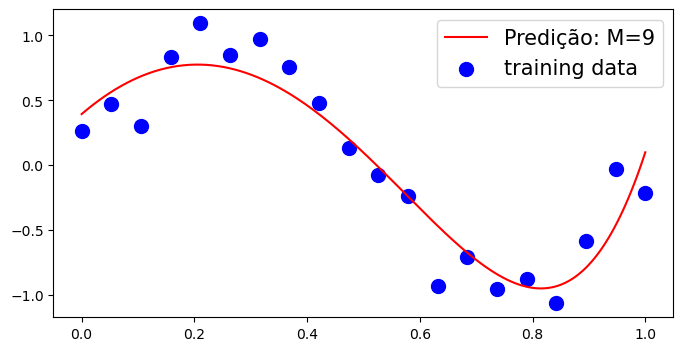

In [12]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

poly9 = PolynomialFeatures(degree=9)
X = poly9.fit_transform(x_train)
model = Lasso(alpha = 0.001)
model.fit(X,y_train)
Xplot=poly9.fit_transform(xplot)
Y_pred = model.predict(Xplot)
fig = plt.figure(figsize=(8, 4))
plt.plot(xplot, Y_pred, label='Predição: M=9', color = 'red')
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, 
            label="training data")
plt.legend(fontsize=15)
plt.show(True)

Podemos verificar os parâmetros ajustados pelo modelo. Notem que muitos deles são iguais a zero, pois não contribuem para o ajuste. Essa atribuição para serem nulos permite evitar a ocorrência de overfitting.



In [13]:
model.coef_

array([ 0.        ,  3.73098351, -9.14974607, -0.        ,  0.        ,
        2.87700819,  2.24702767,  0.        ,  0.        , -0.        ])

Também podemos usar regularização em uma base de dados. Vamos considerar a regressão linear na base de vendas.



In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# leitura dos dados
data = pd.read_csv('/home/edmurcn/Documentos/MeusProjetos/Fis._Estat._Comp./Intro._Ciencia_Dados/data/Advertising.csv', header=(0))
# remove nan (Not a Number)
data = data.dropna()
data = data.drop(data.columns[[0]], axis=1) # remove the first column (if useless)
# define a variável de saída
ylabel = data.columns[-1]
print('Número de observações e atributos:',data.shape)
list_labels = list(data.columns)
data.head(10)

Número de observações e atributos: (200, 4)


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [25]:
# Converte os dados para numpy para facilitar a manipulação
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

In [26]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
p = 0.3 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

In [27]:
from sklearn.linear_model import LinearRegression

# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

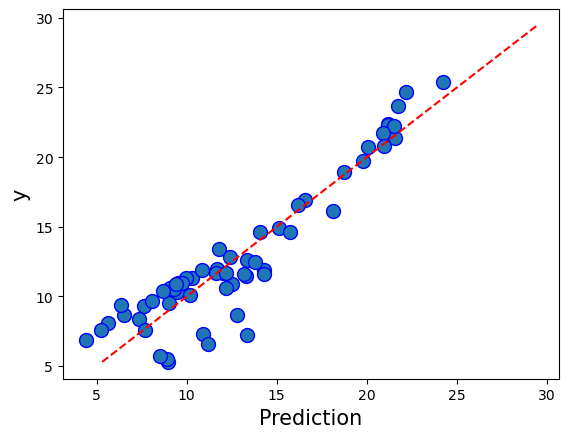

In [28]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

Calculando o coeficiente R2 e o erro:

In [29]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

R2 = r2_score(y_test, y_pred)
print('R2:', R2)

RSME = mean_squared_error(y_test, y_pred)
print("RSME:", RSME)          # Calculate the test MSE


R2: 0.8609466508230369
RSME: 3.796797236715217


# Ridge regression
Vamos considerar dados sobre propaganda em rádio, televisão e jornais. Estamos interessados em determinar se o investimento em propaganda aumenta as vendas e, em caso afirmativo, qual seria o veículo de divulgação mais vantajoso.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# leitura dos dados
data = pd.read_csv('/home/edmurcn/Documentos/MeusProjetos/Fis._Estat._Comp./Intro._Ciencia_Dados/data/Advertising.csv', header=(0))
# remove nan (Not a Number)
data = data.dropna()
data = data.drop(data.columns[[0]], axis=1) # remove the first column (if useless)
# define a variável de saída
ylabel = data.columns[-1]

print('Número de observações e atributos:',data.shape)
list_labels = list(data.columns)
data.head(10)

Número de observações e atributos: (200, 4)


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [32]:
# Converte os dados para numpy para facilitar a manipulação
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

In [33]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
p = 0.3 # fracao de elementos no conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Se aplicarmos a função Ridge com alpha = 0, obtemos o mesmo modelo linear ajustado anteriormente:



In [35]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

# ajusta o modelo ridge regression
ridge = Ridge(alpha = 0)
ridge.fit(X_train, y_train)             # Fit a ridge regression on the training data
y_pred = ridge.predict(X_test)           # Use this model to predict the test data
RSME = mean_squared_error(y_test, y_pred)
print("RSME:", RSME)          # Calculate the test MSE

from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print('R2:', R2)

RSME: 3.7967972367152165
R2: 0.8609466508230369


Considerando outro valor de alpha:

In [36]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

# ajusta o modelo ridge regression
ridge2 = Ridge(alpha = 50)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
y_pred = ridge2.predict(X_test)           # Use this model to predict the test data
RSME = mean_squared_error(y_test, y_pred)
print("RSME:", RSME)          # Calculate the test MSE

from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print('R2:', R2)

RSME: 5.438927003164364
R2: 0.8008055293536458


Podemos mostrar a predição e os valores originais.

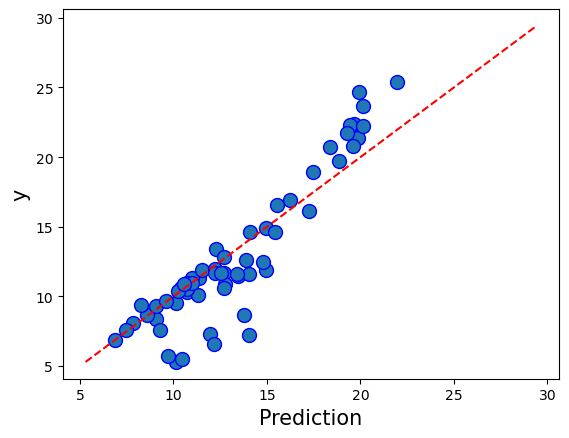

In [37]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

No modelo ridge regression, temos que o parâmetro $\alpha>0$. Vamos analisar como o coeficiente R2 varia de acordo com $\alpha$.

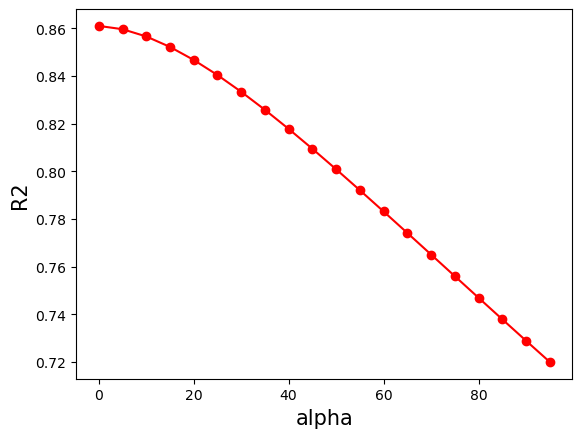

In [38]:
vR2 = []
valpha = []
# variamos os valaores de alpha
for alpha in np.arange(0,100,5):
    ridge2 = Ridge(alpha = alpha)
    ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
    y_pred = ridge2.predict(X_test)           # Use this model to predict the test data
    r2 = r2_score(y_test, y_pred)
    vR2.append(r2)
    valpha.append(alpha)
plt.plot(valpha, vR2, '-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.show(True)

Para $\alpha>0$, o coeficiente R2 diminui, indicando que o ajuste tradicional, para $\alpha=0$, resulta em um resultado melhor.

Ou seja, para esse conjunto de dados, a melhor opção é considerar a regressão linear simples.

# LASSO
Usando os dados anteriores, vamos aplicar o método Lasso (least absolute shrinkage and selection operator) aos dados.

In [40]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alpha = 1
# notice that we need to normalize the attributes: normalize = True
lasso = Lasso(alpha=alpha, max_iter=100000)
lasso.fit(X_train, y_train)             # Fit a ridge regression on the training data
y_pred = lasso.predict(X_test)           # Use this model to predict the test data

RSME = mean_squared_error(y_test, y_pred)
print("RSME:", RSME)          # Calculate the test MSE

from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print('R2:', R2)

RSME: 5.307012108303735
R2: 0.8056367612559759


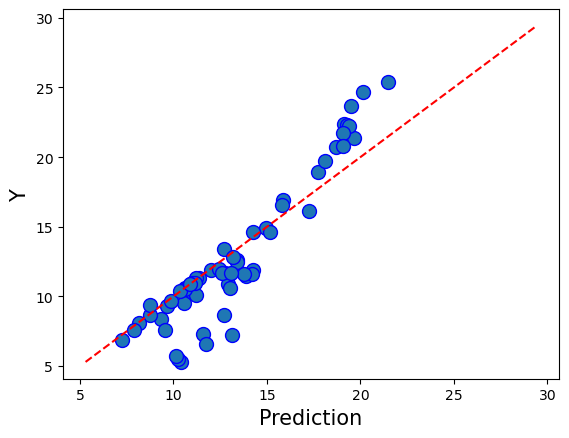

In [41]:
import matplotlib.pyplot as plt

fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("Y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

#plt.grid(True)
plt.show(True)

Variando alpha, vemos que o coeficiente R2 diminui ainda mais.

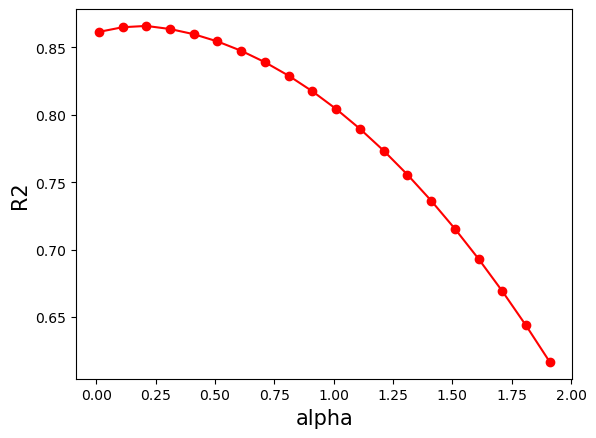

In [42]:
vR2 = []
valpha = []
for alpha in np.arange(0.01,2,0.1):
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train, y_train)             # Fit a ridge regression on the training data
    y_pred = lasso.predict(X_test)           # Use this model to predict the test data
    r2 = r2_score(y_test, y_pred)
    vR2.append(r2)
    valpha.append(alpha)
plt.plot(valpha, vR2, '-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.show(True)

No método Lasso, podemos calcular os coeficientes de modo a selecionar os atributos mais importantes. Se algum atributo apresentar os respectivo coeficiente igual a zero, então esse atributo não contribui para a regressão.



In [43]:
lasso = Lasso(alpha = 0.2)
lasso.fit(X_train, y_train)             # Fit a ridge regression on the training data
print('Coeficientes: TV, radio, newspaper')
lasso.coef_

Coeficientes: TV, radio, newspaper


array([3.4972244 , 2.76701376, 0.        ])

Ou seja, vemos que a variável newspaper recebeu peso igual a zero, indicando que não é importante na predição. Portanto, não vale a pena investir em anúncios em jornais, pois o ganho nas vendas pode ser obtido com investimentos em TV e radio.

